# Sanity Check Notebook 
Mainly used to validate some subject data notably by visualizing some MRI volumes.

**BEWARE TO NOT RUN NOTEBOOK ON ULILLE HPC, EXCEPT IN AN INTERACTIVE SESSION I GUESS**

- Authors: Alexis Mélot
- Date: 30/01/2026

In [1]:
# open data bvec to count how many directions have been sampled in the q-space. 
# open .bvec file as .txt file and count how many number there is diveded by 3 (number of dimensions) to get the resutls 
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [ ]:
# Read .bvec files and count directions
recap_presence = np.zeros((82, 2))  # Column 0 for ses-pre, Column 1 for ses-post
for i in range(1, 83):
    sub_id = f"sub-{i:02d}"
    file_path_pre = f'/Users/alex/Documents/Travail/PSI/multimodhal_bids/bids/{sub_id}/ses-pre/dwi/{sub_id}_ses-pre_dwi.bvec'
    file_path_post = f'/Users/alex/Documents/Travail/PSI/multimodhal_bids/bids/{sub_id}/ses-post/dwi/{sub_id}_ses-post_dwi.bvec'
    
    
    try :
        with open(file_path_pre, 'r') as file:
            content_pre = file.readlines()
            recap_presence[i-1, 0] = 1  # Mark presence for ses-pre
    except FileNotFoundError:
        continue
    
    try:
        with open(file_path_post, 'r') as file:
            content_post = file.readlines()    
            recap_presence[i-1, 1] = 1  # Mark presence for ses-post
    except FileNotFoundError:
        continue

    # count the number of directions
    # concatenate all the lines and split by spaces
    directions_pre, directions_post = [], []
    for line in content_pre:
        line = line.strip()
        directions_pre.extend(line.split())
    for line in content_post:
        line = line.strip()
        directions_post.extend(line.split())
    num_directions_pre = len(directions_pre) // 3  # each direction has
    num_directions_post = len(directions_post) // 3  # each direction has 3 components (x, y, z)
    
    if recap_presence[i-1, 0] == 1: 
        print(f"{sub_id} ses-pre: {num_directions_pre} directions")
    if recap_presence[i-1, 1] == 1:
        print(f"{sub_id} ses-post: {num_directions_post} directions")
# print number of pre at 0 and post at 0 
print(f"Nb ses-pre complete: {np.sum(recap_presence[:,0]==1)}")
print(f"Nb ses-post complete: {np.sum(recap_presence[:,1]==1)}")

print("Nb complete subjects :", np.sum((recap_presence[:,0]==1) & (recap_presence[:,1]==1)))

In [ ]:
# read bvalues to check if they are the same for pre and post
for i in range(1, 83):
    sub_id = f"sub-{i:02d}"
    file_path_bval_pre = f'/Users/alex/Documents/Travail/PSI/multimodhal_bids/bids/{sub_id}/ses-pre/dwi/{sub_id}_ses-pre_dwi.bval'
    file_path_bval_post = f'/Users/alex/Documents/Travail/PSI/multimodhal_bids/bids/{sub_id}/ses-post/dwi/{sub_id}_ses-post_dwi.bval'
    
    if recap_presence[i-1, 0] == 1 and recap_presence[i-1, 1] == 1:
        try:
            with open(file_path_bval_pre, 'r') as file:
                bvals_pre = file.read().strip().split()
            with open(file_path_bval_post, 'r') as file:
                bvals_post = file.read().strip().split()
            
            if bvals_pre == bvals_post:
                print(f"{sub_id}: B-values match between ses-pre and ses-post.")
            else:
                print(f"{sub_id}: B-values do NOT match between ses-pre and ses-post.")
        except FileNotFoundError:
            continue

In [24]:
# Plot DWI image
path_synb0_input = '/Users/alex/Documents/Travail/PSI/data/bids/sub-01/ses-pre/dwi/sub-01_ses-pre_dwi.nii.gz'
path_synb0_output = '/Users/alex/Documents/Travail/PSI/results/synb0/01/b0_u.nii.gz'


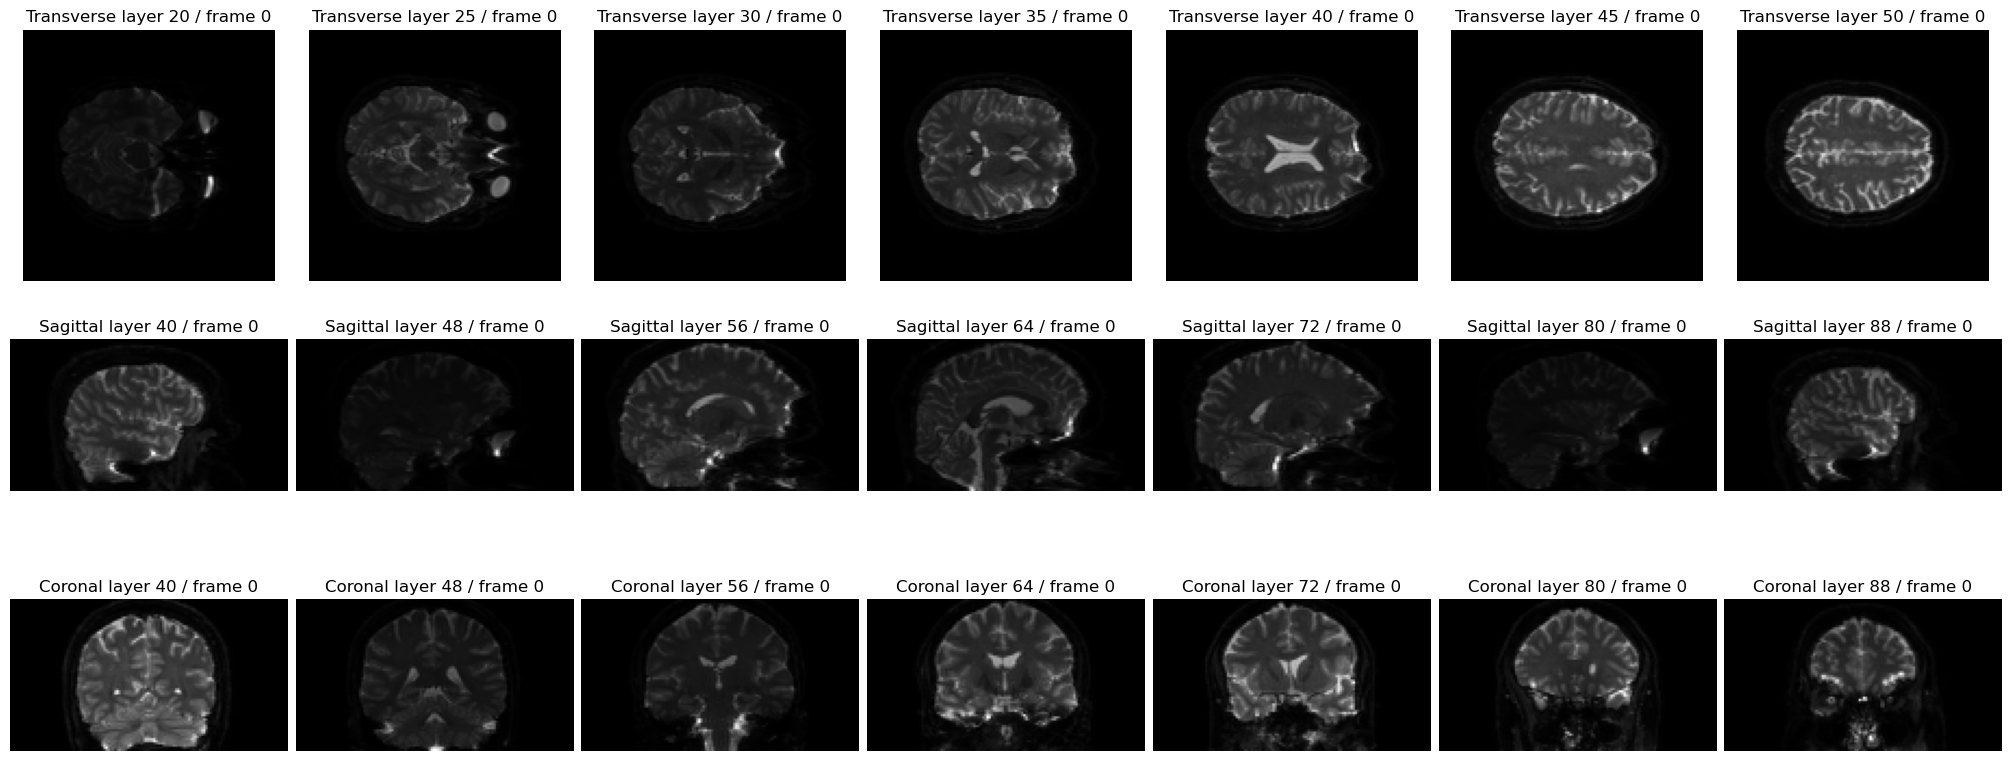

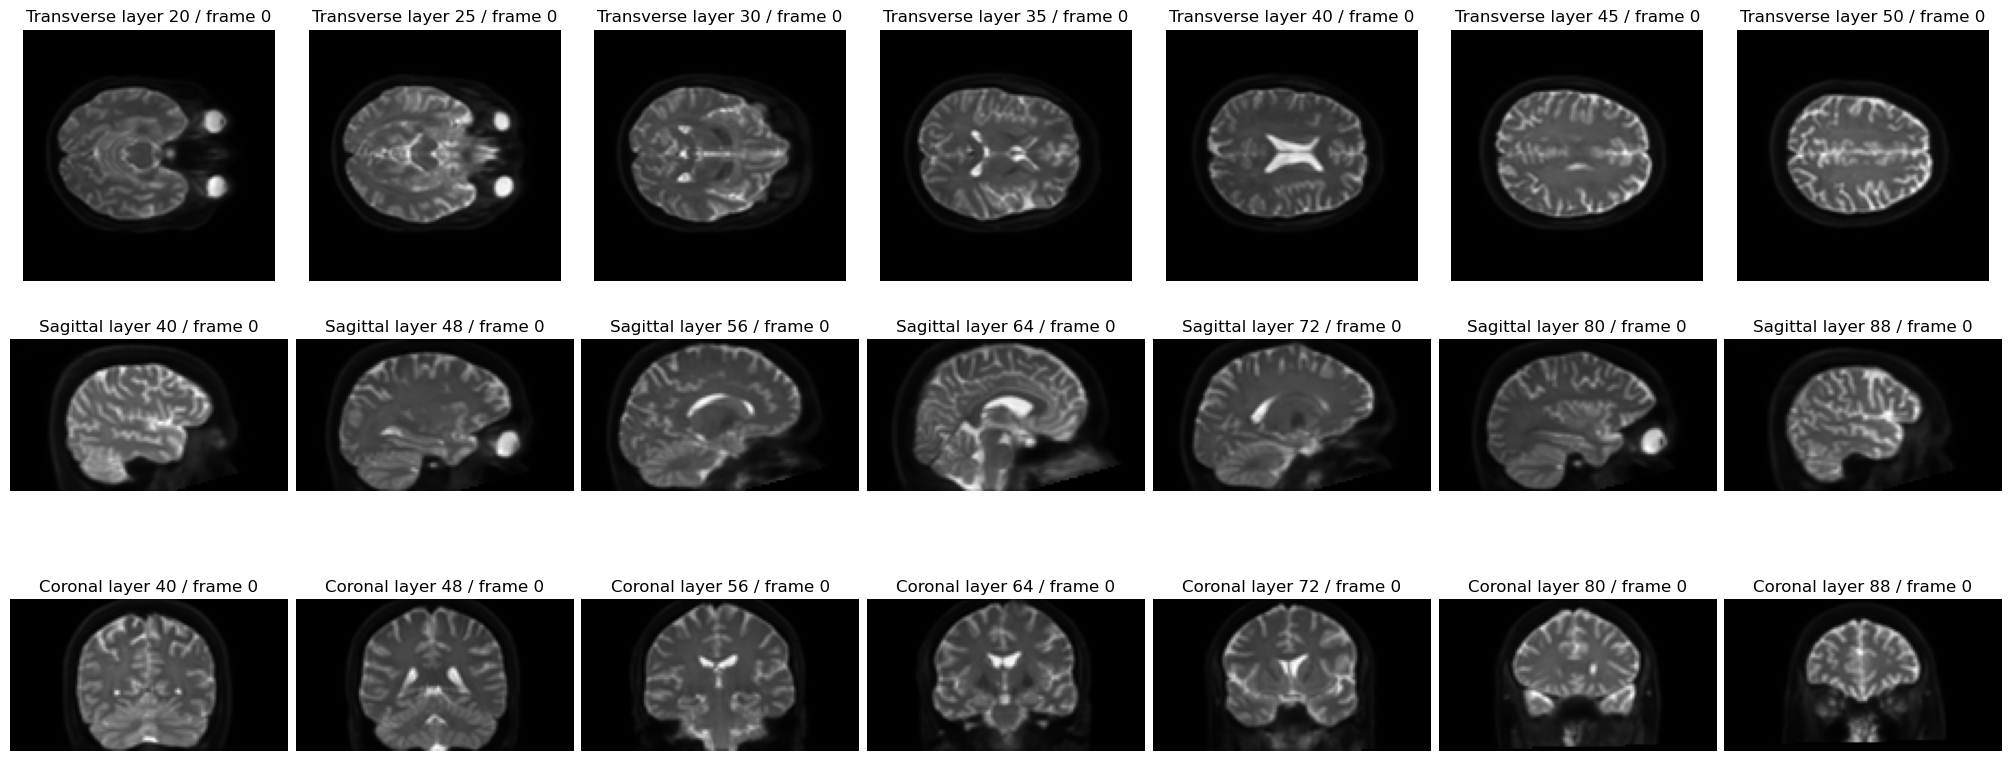

In [25]:
def plot_one_volume_slices(path_nifti, volume_index=0):
    """Plot slices of one volume from a 3D/4D NIfTI DWI image in transverse, sagittal, and coronal views.
    By default, it plots the first volume (index 0).
    """
    dwi_image = nib.load(path_nifti)
    dwi_data = dwi_image.get_fdata()
    if dwi_data.ndim == 4:
        dwi_data_s = dwi_data[:, :, :, volume_index]  # first volume (b0)
    else:
        dwi_data_s = dwi_data  # already 3D
    nb_rows = 3
    nb_cols = 7 

    fig, ax = plt.subplots(nb_rows, nb_cols, constrained_layout=True, figsize=(20, 8))
    # plot on each row the slices of the volume on each axes : Transverse, Coronal, Sagittal

    z_linspace = np.linspace(20, dwi_data_s.shape[2]-20, nb_cols, dtype=int)  # example slice indices to visualize
    y_linspace = np.linspace(40, dwi_data_s.shape[1]-40, nb_cols, dtype=int)  # example slice indices to visualize
    x_linspace = np.linspace(40, dwi_data_s.shape[0]-40, nb_cols, dtype=int)  # example slice indices to visualize

    for j, slice in enumerate(z_linspace):
        ax[0, j].imshow(dwi_data_s[:,:,slice], cmap='gray', interpolation=None)
        ax[0, j].set_title("Transverse layer {} / frame {}".format(slice, 0))
        ax[0, j].axis('off')

    for j, slice in enumerate(x_linspace):
        ax[1, j].imshow(dwi_data_s[slice,:,:].T[::-1,...], cmap='gray', interpolation=None)
        ax[1, j].set_title("Sagittal layer {} / frame {}".format(slice, 0))
        ax[1, j].axis('off')

    for j, slice in enumerate(y_linspace):
        ax[2, j].imshow(dwi_data_s[:,slice,:].T[::-1,...], cmap='gray', interpolation=None)
        ax[2, j].set_title("Coronal layer {} / frame {}".format(slice, 0))
        ax[2, j].axis('off')

    plt.show() 


plot_one_volume_slices(path_synb0_input, volume_index=0)
plot_one_volume_slices(path_synb0_output, volume_index=0)


Test utility functions 

In [12]:
def add_json_sidecar(dwi_json_path, fmap_json_path):
    import json
    import os

    # Load DWI JSON sidecar
    with open(dwi_json_path, 'r') as json_file:
        dwi_json = json.load(json_file)

    dwi_json['B0FieldIdentifier'] = 'synb0'
    # Save JSON to dwi_json_path
    with open(dwi_json_path, 'w') as json_file:
        json.dump(dwi_json, json_file, indent=4)

    # Update fields
    dwi_json['PhaseEncodingDirection'] = 'i-'
    dwi_json['TotalReadoutTime'] = 0.0000001
    dwi_json['EffectiveEchoSpacing'] = 0.000001
    dwi_json['IntendedFor'] = 'bids::' + os.path.abspath(dwi_json_path).replace('\\', '/').split('bids/')[-1].replace('.json', '.nii.gz')
    

    # Save updated JSON sidecar at new_json_path
    with open(fmap_json_path, 'w') as json_file:
        json.dump(dwi_json, json_file, indent=4)
    
    print(f"------ Updated JSON sidecars ------ ")

In [13]:
add_json_sidecar(
    '/Users/alex/Documents/Travail/PSI/data/bids/sub-01/ses-pre/dwi/sub-01_ses-pre_dwi.json',
    '/Users/alex/Documents/Travail/PSI/data/bids/sub-01/ses-pre/fmap/sub-01_ses-pre_dir-PA_epi.json'
)

------ Updated JSON sidecars ------ 
